# Introduction

About the Data
The data set that we are going to study compiles 309 observations of patients with and without lower back pains. It contains 12 different predictors with pretty complicated names but we'll try to explain the most relevant of these predictors as we progress through the study. It also contains 1 target feature called "Attribute" that will get the value "Abnormal" when lower back pain is present and "Normal" when everything is ? Normal, you guessed it.
The description of the data set explain a few of the reasons why lower back pain can occur :

1. The large nerve roots in the low back that go to the legs may be irritated
2. The smaller nerves that supply the low back may be irritated
3. The large paired lower back muscles (erector spinae) may be strained
4. The bones, ligaments or joints may be damaged

An intervertebral disc may be degenerating
We'll see in the data set that we get mostly morphological/positional values, nothing directly telling us that one of the foremetionned things is happening but positional indicators that can definitely put us on the way. This data set does not contain any demographic information ( to my great regret ) about the subject observed. It would've been interesting as some of the values we're going to study typically change between men, women, and ethnicities.

In [1]:
# The classics
import numpy as np
import pandas as pd

# Visualisation tools
import seaborn as sns

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import style

import plotly
from plotly.offline import iplot, init_notebook_mode
from plotly.graph_objs import Scatter3d, Layout, Figure

import graphviz 

# Machine learning unavoidables
from sklearn.decomposition import KernelPCA, PCA
from sklearn.preprocessing import normalize,MinMaxScaler,PolynomialFeatures
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
from sklearn.feature_selection import SelectKBest, chi2

# Goals
Through this notebook, I want to be able to identify the key factors causing lower back pain as well and I want to be able to create understandable classifiers to further human understanding of the problem while keeping a good quality of classification.
I will try to explain my thought process and my decision as thouroughly as possible so that everyone can learn something from this notebook, would it be in the subject of data science or just about back pain.

# Data source



The information is layed out with 12 different featurs, labeld Col1-Col12 (Attribute1-12) and a classification attribute of "Abnormal" or "Normal". The descriptions for each attribute are as follows:

1. Attribute1 = pelvic_incidence (numeric)
2. Attribute2 = pelvic_tilt (numeric)
3. Attribute3 = lumbar_lordosis_angle (numeric)
4. Attribute4 = sacral_slope (numeric)
5. Attribute5 = pelvic_radius (numeric)
6. Attribute6 = degree_spondylolisthesis (numeric)
7. Attribute7 = pelvic_slope(numeric)
8. Attribute8 = direct_tilt(numeric)
9. Attribute9 = thoracic_slope(numeric)
10. Attribute10 = cervical_tilt(numeric)
11. Attribute11 = sacrum_angle(numeric)
12. Attribute12 = scoliosis_slope(numeric)

# Exploratory Data Analysis

In [3]:
# Defining the name of each column as it was given in the dataset
col_list = ['Pelvic_incidence',
               'Pelvic_tilt',
               'Lumbar_lordosis_angle',
               'Sacral_slope',
               'Pelvic_radius',
               'Degree_spondylolisthesis',
               'Pelvic_slope',
               'Direct_tilt',
               'Thoracic_slope',
               'Cervical_tilt',
               'Sacrum_angle',
               'Scoliosis_slope',
               'Attribute',
               'To_drop']

# Loading the data
data = pd.read_csv("Dataset_spine.csv", names=col_list, header=1)

# The last column contained meta-data about the other columns and is irrelevant in our study
data.drop('To_drop', axis=1, inplace=True)


data.head()

,Pelvic_incidence,Pelvic_tilt,Lumbar_lordosis_angle,Sacral_slope,Pelvic_radius,Degree_spondylolisthesis,Pelvic_slope,Direct_tilt,Thoracic_slope,Cervical_tilt,Sacrum_angle,Scoliosis_slope,Attribute
0,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal
1,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal
2,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal
3,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal
4,40.250200,13.921907,25.124950,26.328293,130.327871,2.230652,0.789993,29.3230,12.0036,10.40462,-1.512209,9.6548,Abnormal


In [4]:
# Checking for the integrity of the data is good practice
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 13 columns):
Pelvic_incidence            309 non-null float64
Pelvic_tilt                 309 non-null float64
Lumbar_lordosis_angle       309 non-null float64
Sacral_slope                309 non-null float64
Pelvic_radius               309 non-null float64
Degree_spondylolisthesis    309 non-null float64
Pelvic_slope                309 non-null float64
Direct_tilt                 309 non-null float64
Thoracic_slope              309 non-null float64
Cervical_tilt               309 non-null float64
Sacrum_angle                309 non-null float64
Scoliosis_slope             309 non-null float64
Attribute                   309 non-null object
dtypes: float64(12), object(1)
memory usage: 31.5+ KB


# Class Distribution

D:\anaconda\lib\site-packages\seaborn\categorical.py:3666: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.

D:\anaconda\lib\site-packages\seaborn\categorical.py:3672: UserWarning:

The `size` paramter has been renamed to `height`; please update your code.



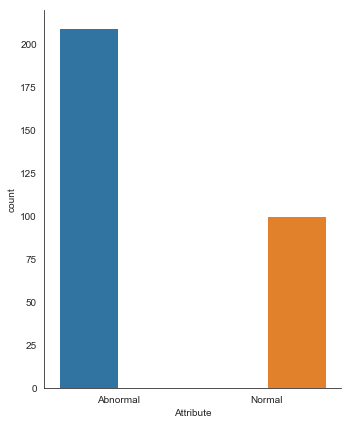

In [6]:
sns.set_style("white")
g=sns.factorplot(x='Attribute', hue='Attribute', data= data, kind='count',size=6,aspect=.8)

From a simple look, we could tell that the proportions are 2/3 Abnormal and 1/3 Normal which is actually quite unusual for medical data. Usually the Abnormal cases are extremely rare and this creates very skewed data sets.

We don't have any information on how the dataset was gathered and created so unfortunately we can't really know why these numbers seem so unusual.

We'll get to the true count of each class later.

In [7]:
# Replacing our attribute with binary values : 
data['Attribute'] = data['Attribute'].map({'Abnormal': 1, 'Normal': 0})

# Correlations


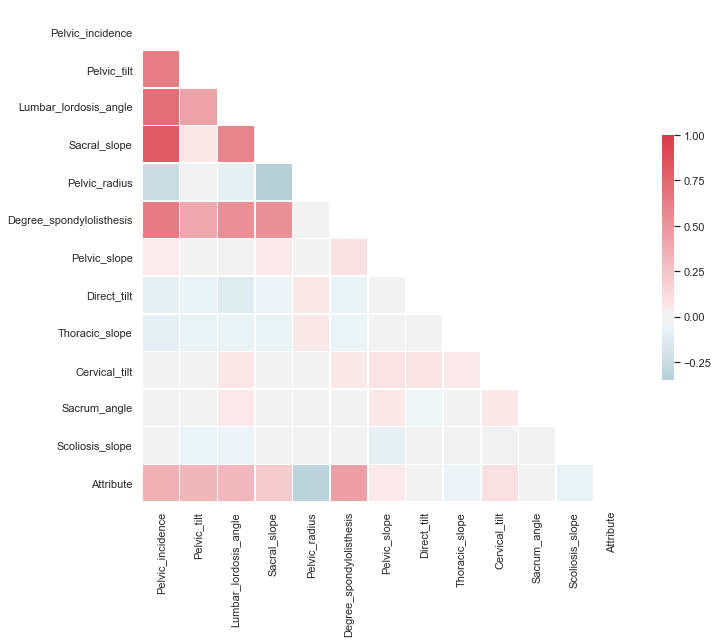

In [8]:
sns.set(style="white")
d = data
corr = d.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
g=sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

The first thing we want to look at is how our features are correlated with our target. As they are represented on the last line of this heatmap they are quite easy to see. This way we identify that :

1. Pelvic_incidence
2. Pelvic_tilt
3. Lumbar_lordosis_angle
4. Sacral_slope
5. Pelvic_radius
6. Degree_spondylolisthesis

Are all strongly correlated with our target values, with Degree_spondylolisthesis being the strongest one and Pelvic_radius being a negative correlation.

Secondly, we might want to look at other correlations, maybe some features are completely correlated and redundant, thus, not that usefull in a classification problem...
The strongest correlations that we see between predictors is the one between Sacral_slope, Pelvic_Tilt, and Pelvic_incidence, we will definitely look into that later.



D:\anaconda\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning:

invalid value encountered in true_divide

D:\anaconda\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning:

invalid value encountered in double_scalars



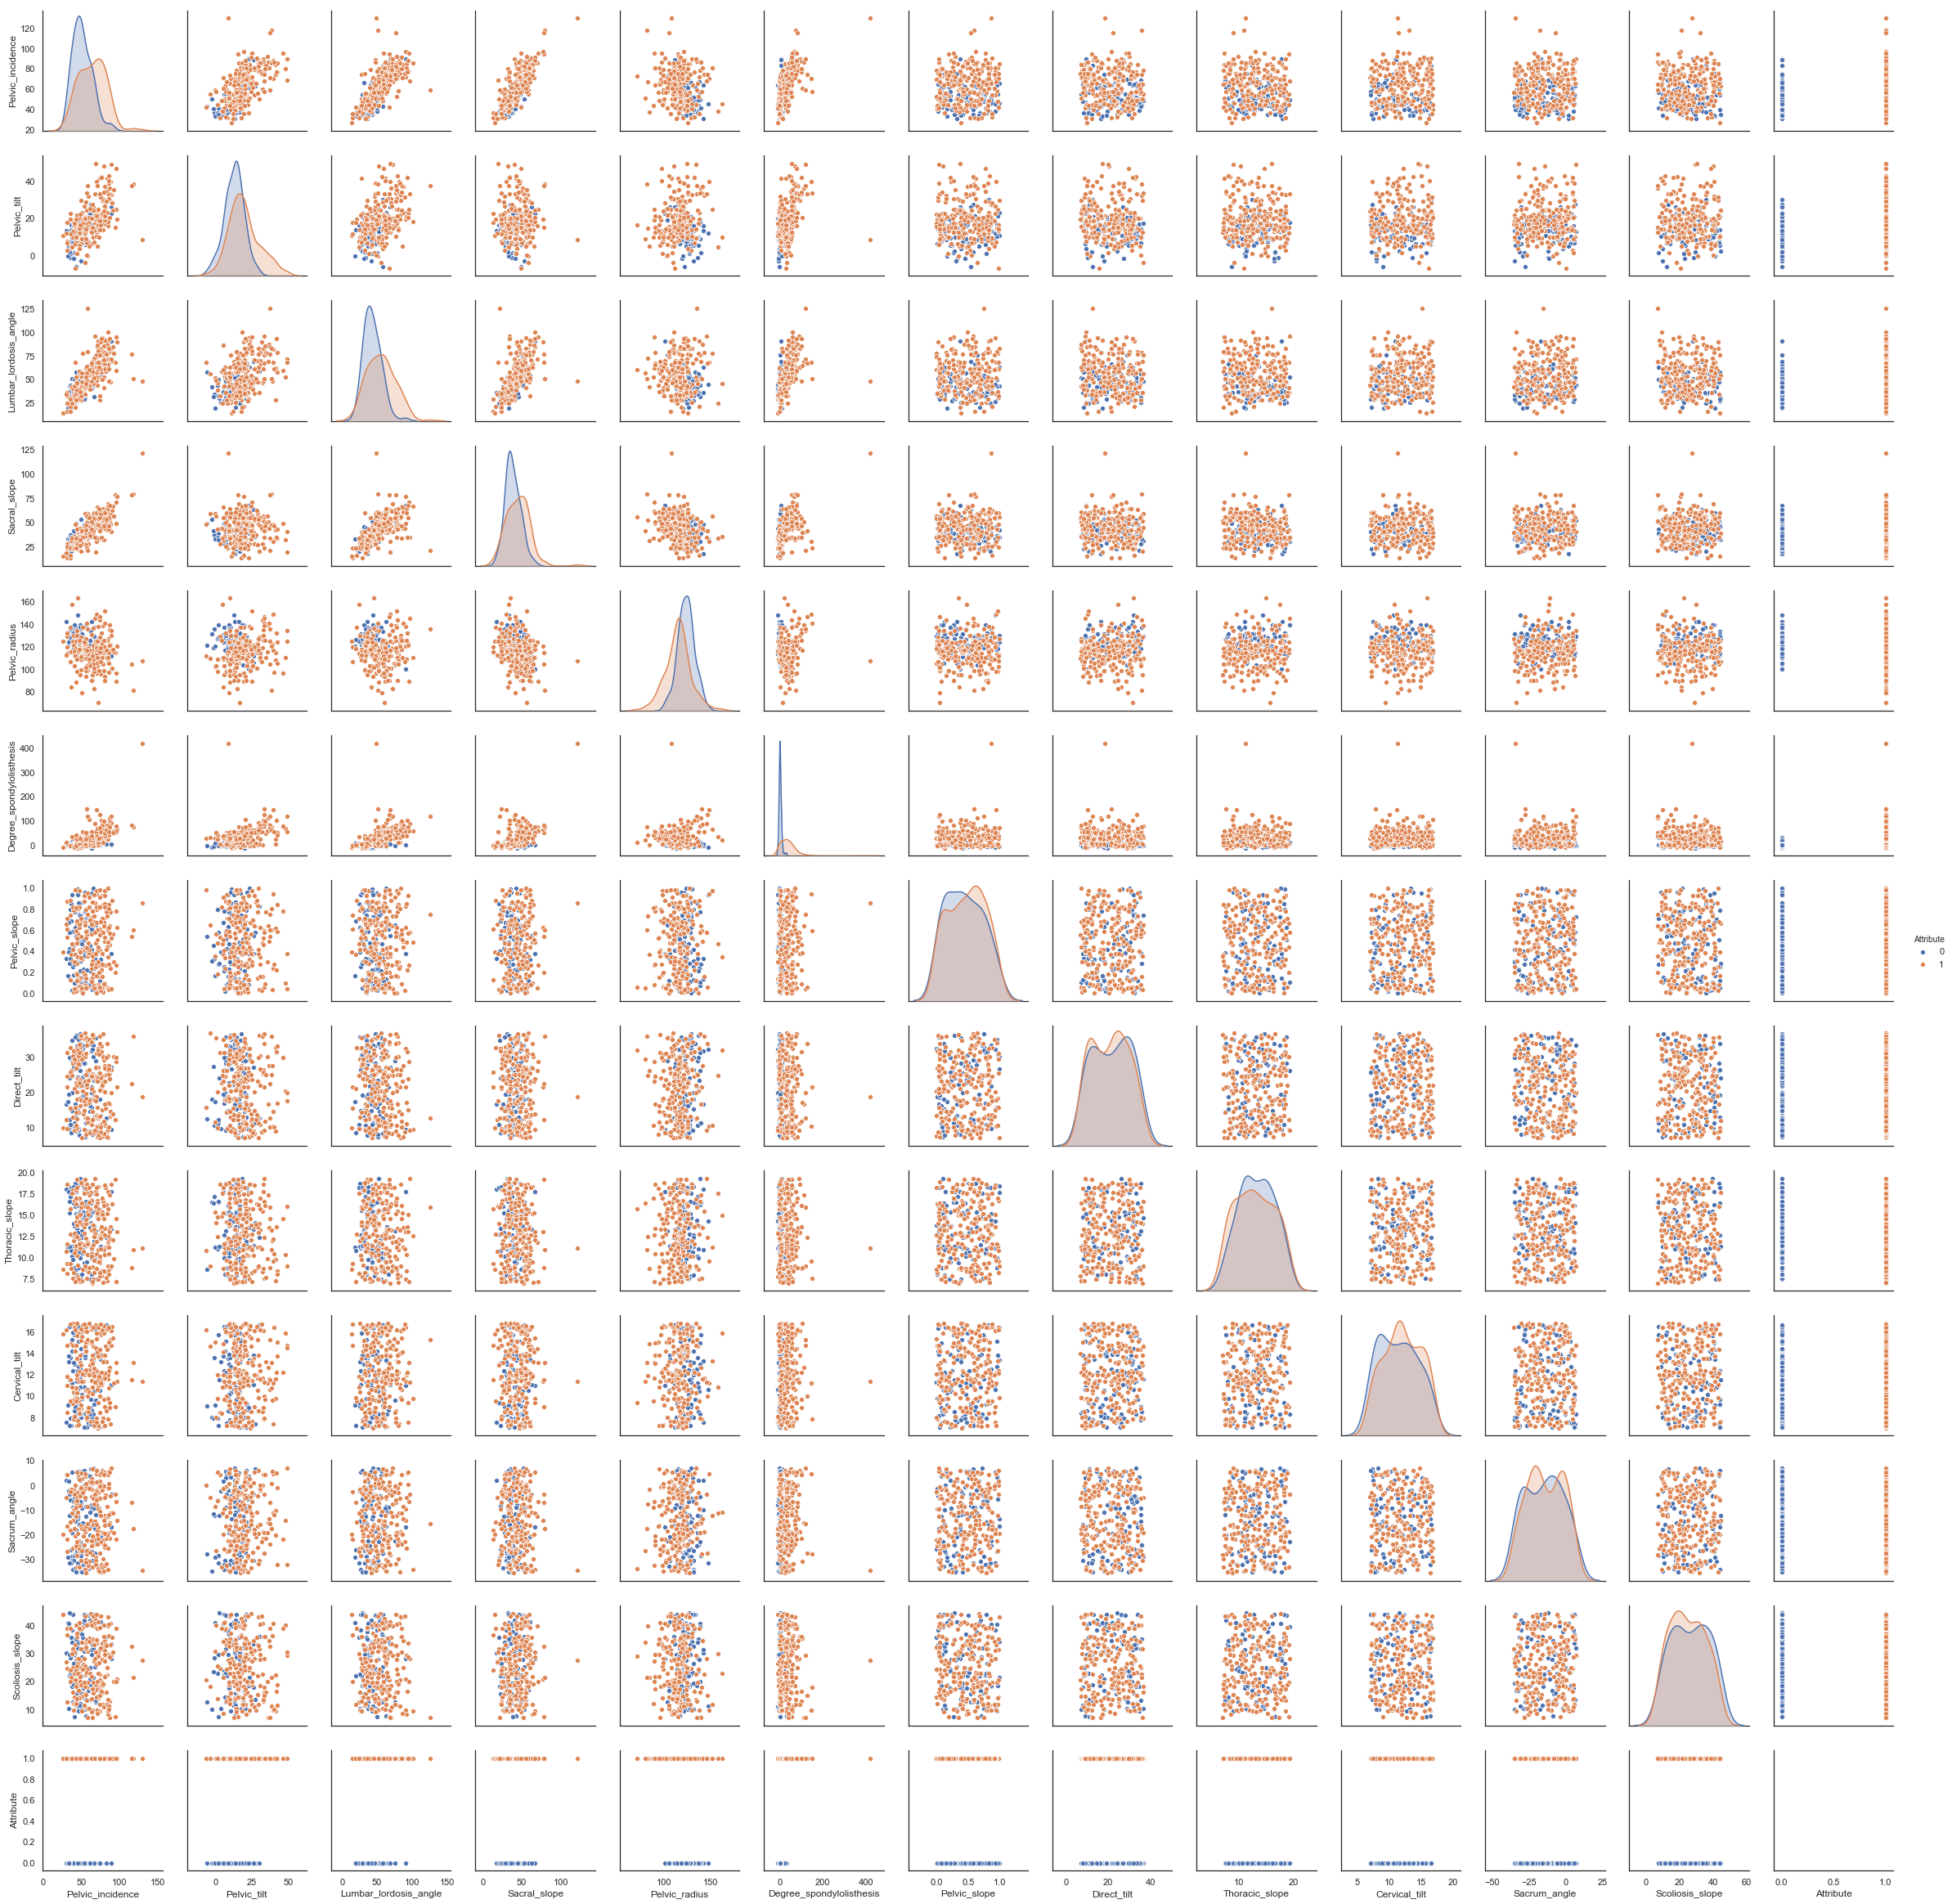

In [9]:
sns.pairplot(data, hue="Attribute")
plt.show()

It may seem a bit much at first sight, but taking each cell independently this graph is actually very understandable and holds even more information than the correlation map we plotted before.


# Univariate exploration of relevant factors

Degree spondylolisthesis


Spondylolisthesis is derived from the Greek words “spondy”, meaning vertebra, and “listhesis”, meaning movement. Spondylolisthesis is an abnormal condition in which there is instability in the spinal column, as one vertebral body is shifting forward over the next vertebrae.
ttPardon my French, more simply, the degree of spondylolisthesis measures ( more or less ) how much a vertebra has slipped from its original position.

Let's see how it is distributed among the classes.

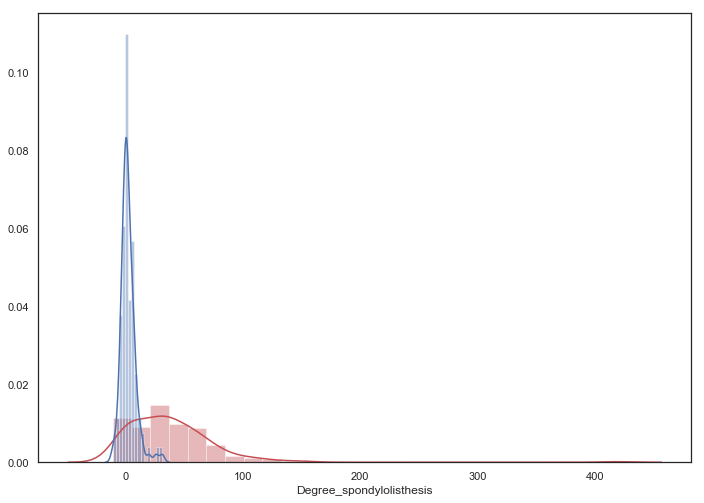

In [11]:
# A simple reusable function to plot the distribution of one feature with different colours for each class
def hist_graph(column):
    a4_dims = (11.7, 8.27)
    fig, ax = plt.subplots(figsize=a4_dims)
    sns.distplot(data[data['Attribute']==1][column], color='r')
    sns.distplot(data[data['Attribute']==0][column],ax=ax, color='b') 

hist_graph('Degree_spondylolisthesis')

In [12]:
# A simple and reusable function to show the numbers in a dataframe
def compare_df(column):
    norm = data[data['Attribute']==0][[column]].describe()
    abnorm = data[data['Attribute']==1][[column]].describe()

    df = pd.DataFrame(data = norm)
    df['Normal'] = df[column]
    df.drop(column, axis=1, inplace=True)
    df['Abnormal']= abnorm
    return df

compare_df('Degree_spondylolisthesis')

,Normal,Abnormal
count,100.000000,209.000000
mean,2.186572,37.959677
std,6.307483,40.708721
min,-11.058179,-10.675871
25%,-1.511360,7.918501
50%,1.152710,32.108537
75%,4.968807,55.506889
max,31.172767,418.543082


# For the Normal class :

1. The population is centered around 1.15.
2. Small standard deviation showing a very centered classs (just see the histogram).
3. The minimum value for the Normal class is lower than the minimum value for the Abnormal class showing that the degree spondylolisthesis doesn't have the same influence on back pains for a positive or for a negative displacement.
4. The maximum value seems a bit high but since 75% of the Normal population is under ~5, these cases could be either outliers, or show that other factors can maybe compensate for the degree spondylolisthesis.

For the Abnormal class :

1. Both the mean and median are above the Normal's class maximum at respectively ~38 and ~32.
2. High standard deviation showing a wide spread of the values and of the resulting issues.
3. Still goes down in the negative values, then again showing little influence of this parameter once below zero.
4. We'll take a closer look at that guy with the max value of 418...

Sacral slope, Pelvic incidence, and Pelvic tilt

The sacral slope is the angle between a horizontal plane and the upper surface of the sacrum. The sacrum is the last bone in our spine where the 5 vertebraes have fused together to create one bone. At the end of the sacrum, we can find the coccyx, remnant bone of what used to be a tail for human beings. The sacral slope is closely related to the pelvic incidence and to the pelvic tilt by definition :



Pelvic Incidence = Pelvic Tilt+Sacral Slope

We don't have any information on the ethnicity of the patients in this data set, but it is good to notice that different values are found among different ethnicities for the sacral slope, this will help explain for variations of values that would seem abnormal otherwise. This is not only true for ethnicities but also for genders.

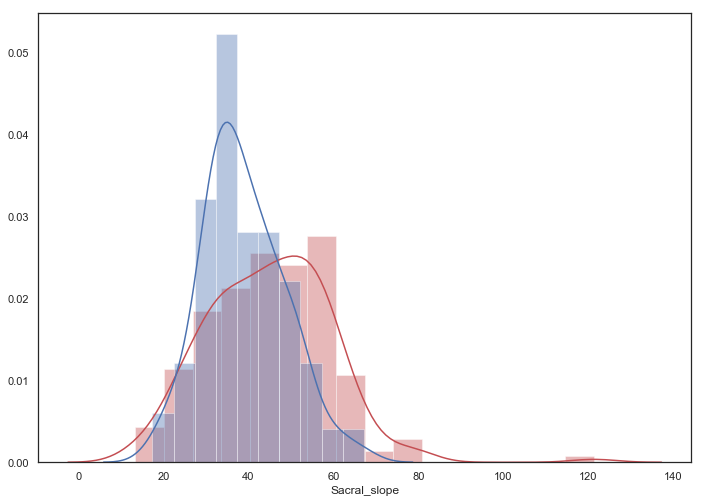

In [13]:
hist_graph('Sacral_slope')

In [14]:
compare_df('Sacral_slope')

,Normal,Abnormal
count,100.000000,209.000000
mean,38.863830,44.922628
std,9.624004,14.547159
min,17.386972,13.366931
25%,32.340487,34.380345
50%,37.059694,44.644130
75%,44.608788,55.154267
max,67.195460,121.429566


Not much stands out from the observation of the sacral slope alone. The Abnormal class usually has a slightly higher sacral slope than the normal class but it stays within one standard deviation of the Normal class.
One thing we can notice is that then again, the Abnormal class is more widely spread than the Normal class and that we have among the Abnormal class one ( or several ) outliers around 120.

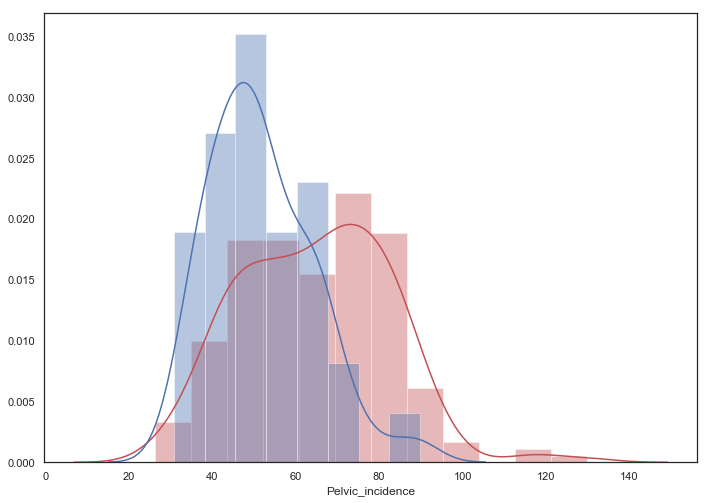

In [15]:
hist_graph('Pelvic_incidence')

In [16]:
compare_df('Pelvic_incidence')

,Normal,Abnormal
count,100.000000,209.000000
mean,51.685244,64.700527
std,12.368161,17.704157
min,30.741938,26.147921
25%,42.817849,50.066786
50%,50.123115,65.536003
75%,61.470097,77.655119
max,89.834676,129.834041


Same thing as before, Normal class is more centered and usually lower than the Abnormal class which is again more widely spread.
As we saw in the pairplot drawn earlier, there is almost never in this data set one single factor that will allow us to determine the normality or abnormality of a patient, but combinations of these parameters through feature engineering may help, even a human to tell at first glance the status of a patient.

# Pelvic tilt distribution

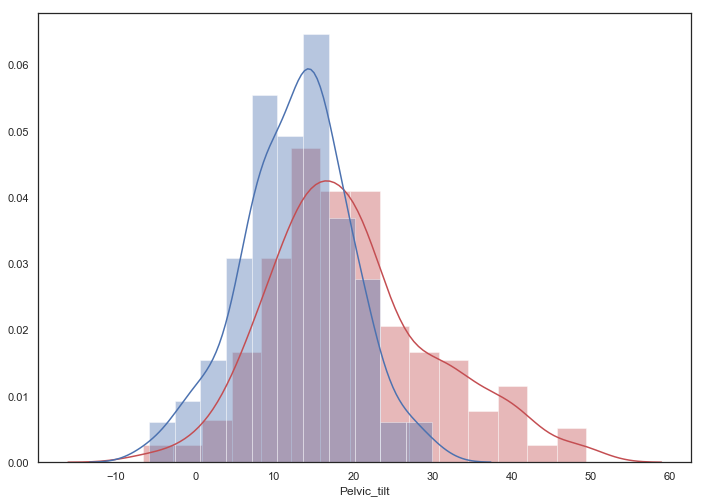

In [17]:
hist_graph('Pelvic_tilt')

In [18]:
compare_df('Pelvic_tilt')

,Normal,Abnormal
count,100.000000,209.000000
mean,12.821414,19.777899
std,6.778503,10.539372
min,-5.845994,-6.554948
25%,8.799951,13.040974
50%,13.482435,18.774071
75%,16.785953,24.822631
max,29.894119,49.431864


A slight shift to the right for the Abnormal class that is again more widespread than the Normal one.

1. While the Normal class seems to follow a Gaussian Distribution, the Abnormal class seems to follow more of a Poisson distribution with its longer tail on the right.
2. Every case with a Pelvic tilt about 29.89 will be classified as Abnormal.
3. Negative values show little impact by themselves.


# Pelvic radius
The pelvic radius is the angle formed between a vertical plane and the hip-axis/posterior superior corner of S1 ( first element of the sacrum ) line.



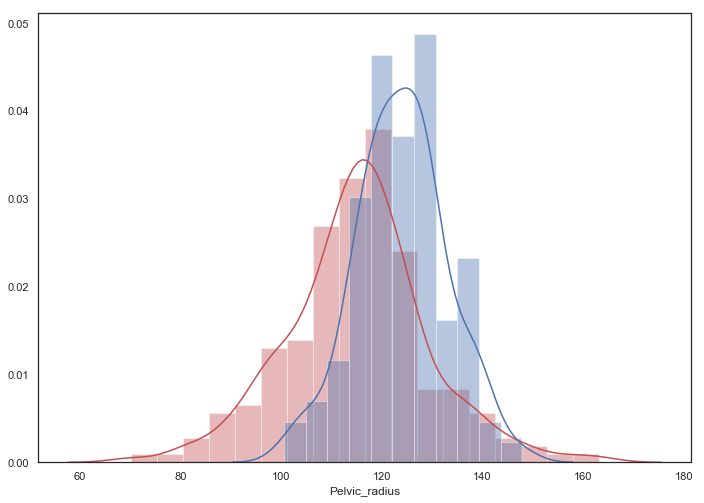

In [19]:
hist_graph('Pelvic_radius')

In [20]:
compare_df('Pelvic_radius')

,Normal,Abnormal
count,100.000000,209.000000
mean,123.890834,115.156204
std,9.014246,14.078340
min,100.501192,70.082575
25%,118.182659,107.690466
50%,123.874328,115.723530
75%,129.040401,123.159251
max,147.894637,163.071041


This is the first time that we are seeing the Abnormal class shifted to the left compared to the Normal class.

1. Both have almost normal distributions, as per usual.
2. The Abnormal class is still more widespread than the Normal class.
3. The Normal class distribution is entirely contained into the Abnormal class distribution, giving us a lower and upper bound for the Normal class between ~100.5 and ~147.9.

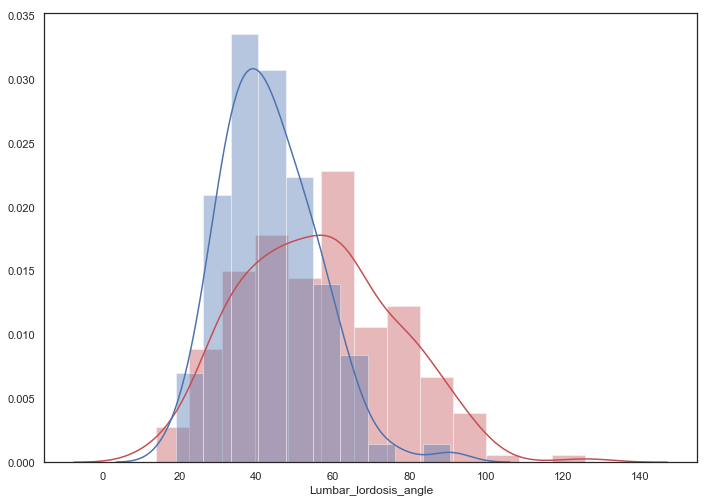

In [21]:
hist_graph('Lumbar_lordosis_angle')

In [22]:
compare_df('Lumbar_lordosis_angle')

,Normal,Abnormal
count,100.000000,209.000000
mean,43.542605,56.003438
std,12.361388,19.684057
min,19.071075,14.000000
25%,35.000000,41.467855
50%,42.638923,56.300000
75%,51.602346,68.118403
max,90.563461,125.742385


We recognize here what we've been seeing previously in the most of the other parameters that we have studied.

1. Higher values for the Abnormal class ( right-shift ).
2. Higher spread for the Abnormal class.
3. Normal class almost contained by the Abnormal class, giving us here just an upper bound where all patients with above ~90 wil be classified as Abnormal.

Looking at the pairplot and at the correlation graph, we have drawn the most relevant distributions so far. The others parameters present very similar distribution for both Normal classes and Abnormal classes and their univariate study would not give us much insight.

Both our correlation plot and the shallow decision tree we used gave us an idea of what parameters were the most relevant to determine the Attribute of a patient. Let's try to create a new variable from the previous ones that will have even more weight for the predictions.

# Feature Engineering

Feature engineering is the process of creating new features from data to achieve better modelisation of the problem. It can be done before or after fitting the dataset to a simple model to see how each feature would impact on the quality of the model, but in the case of binary classification, we will see clearly in the histogram distribution if a new feature helps to separate the classes even more. There are lots of ways to generate new features :

1. From domain knowledge
2. From observation of the data
3. From dimensionality reduction techniques such as PCA
4. Just creating combinations of our current parameters

# PCA
In simple words, Principal Component Analysis or PCA tries to create linear combinations of the features in our data set to represent its variance as well as possible.
For us, it can be a tool to try to create a feature that will separate the target as well as possible. That is, if PCA manages to represent the data set accurately.

In [23]:
# Feature scaling
sc = MinMaxScaler()
X_std = sc.fit_transform(X)

# Creating the PCA
pca = PCA(n_components=3)

# Fitting the PCA to the data set
pca.fit(X_std)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

A good way to verify the quality of the PCA is by checking its explained_variance. This will show how much of the variance of the dataset the PCA manages to express for each of its component, thankfully our PCA object has a method 

.explained_variance_ratio_that does exactly this.

In [24]:
pca.explained_variance_ratio_

array([ 0.15836303,  0.1490722 ,  0.13674482])

# Polynomial Features

Creating new features from polynomial combinations and then filtering through them is also way of doing feature engineering. That being said, using PolynomialFeaturescan be computationally expensive and slow. The reason behind this is that it is going to create all the combinations possible between all the selected features, including ( if you wish so ) power features from the previous ones ( understand squared, cubed, etc.) .

Here we specified that we wanted a maximum degree of 2 and I have 12 parameters.

we can expect:

1. (122)=66  New interacting features,
2. 12∗1=12  Squared features, and
3. 12  of our old features.


That gives us a total of 90 features, let's check it.

In [25]:
PF = PolynomialFeatures(degree=2, include_bias=False)
X_std_pf= PF.fit_transform(X_std)
new_feats = PF.get_feature_names()
X_std_pf.shape

(309, 90)

Everything checks out with what I thought and that's great, but more features doesn't always mean a more accurate model. Some of them will introduce noise, some of them will make us overfit, some of them are just straight out bad.

Now there are a lot of different methods to evaluate the quality of a given feature in regards to its target, and a lot of them happen actually after fitting an algorithm to the new data set and seeing an improvement or a loss in the quality of the algorithm ( here we will measure the quality of a classifier via the roc-auc value).

For the moment I will focus on trying to evaluate the quality of the new features a priori following the  χ2  evaluation of these features and by keeping only the 10 best results.

In [26]:
Kbest =  SelectKBest(chi2, k=10)
X_std_pf_chi10 = Kbest.fit_transform(X_std_pf, y)
selected = Kbest.get_support()

In [27]:
features=[]
for feat, sel in zip(new_feats, selected) : 
    if sel == True :
        features.append(feat)

feat_col=[]
for i in features :
    split = i.split()
    if len(split)==1 :
        pow = split[0].split('^')
        if len(pow) == 1:
            nb =int(''.join([j for j in pow[0] if j.isdigit()]))
            col=data.columns[nb]
            feat_col.append(col)
        else :
            nb =int(''.join([j for j in pow[0] if j.isdigit()]))
            col=data.columns[nb]+'^'+pow[1]
            feat_col.append(col)
    else:
        clean =''.join([j for j in i if j.isdigit()])
        col=data.columns[int(clean[0])]+'*'+data.columns[int(clean[1])]
        feat_col.append(col)

# Feature selected by the  χ2  are as follow :

In [28]:
feat_col

['Degree_spondylolisthesis',
 'Pelvic_incidence^2',
 'Pelvic_incidence*Pelvic_tilt',
 'Pelvic_incidence*Lumbar_lordosis_angle',
 'Pelvic_incidence*Degree_spondylolisthesis',
 'Pelvic_tilt^2',
 'Pelvic_tilt*Lumbar_lordosis_angle',
 'Pelvic_tilt*Degree_spondylolisthesis',
 'Lumbar_lordosis_angle^2',
 'Lumbar_lordosis_angle*Degree_spondylolisthesis']

# Boxing Features
It is another technique that can be used to create new features. To do this we use the things we learned through our previous EDA to create new categorical features telling us if a value is above, below, or in between certain values.

For example, when we were looking at the distribution of the Sacral_slope amongst the classes, we realised that there was no Normal patient with a Sacral_slope value above 67.
Thus, we can create a category 'ss>67' that would take 1 as a value if it is True and 0 if it is False.

Let's try to implement a few of these boxing features.

In [29]:
box_deg = (data.Degree_spondylolisthesis > data[data['Attribute']==0].Degree_spondylolisthesis.max()).map({False: 0, True: 1})
box_ss  = ((data.Sacral_slope > data[data['Attribute']==0].Sacral_slope.max()) & (data.Sacral_slope > data[data['Attribute']==0].Sacral_slope.min())).map({False: 0, True: 1})
box_pi  = (data.Pelvic_incidence > data[data['Attribute']==0].Pelvic_incidence.max()).map({False: 0, True: 1})
box_pt  = ((data.Pelvic_tilt > data[data['Attribute']==0].Pelvic_tilt.max()) & (data.Pelvic_tilt > data[data['Attribute']==0].Pelvic_tilt.min())).map({False: 0, True: 1})
box_pr  = ((data.Pelvic_radius > data[data['Attribute']==0].Pelvic_radius.max()) & (data.Pelvic_radius > data[data['Attribute']==0].Pelvic_radius.min())).map({False: 0, True: 1})
box_lla = ((data.Lumbar_lordosis_angle > data[data['Attribute']==0].Lumbar_lordosis_angle.max()) & (data.Lumbar_lordosis_angle > data[data['Attribute']==0].Lumbar_lordosis_angle.min())).map({False: 0, True: 1})
X_box = np.array([box_deg,box_ss,box_pi,box_pt,box_pr,box_lla]).reshape(309,6)

In [30]:
# Adding the boxing features to the other ones
X_std_box = np.hstack([X_std,X_box])
X_std_pf_chi10_box = np.hstack([X_std_pf_chi10,X_box])

# Simple model effect
Now that we have created these new features and these new sets of predictors, we would like to see their effect on the AUC of a simple classifier, since we used a Decision Tree earlier, we'll keep using it for simplicity reasons.

In [31]:
# Creating a list through which we'll iterate the Decision Tree
X_list=[X_std, X_std_pf, X_std_pf_chi10,X_std_box, X_std_pf_chi10_box]
results = []

clf = DecisionTreeClassifier(random_state=42)

# Getting cross-validated scores for each of the new data sets
for X_set in X_list :
    clf.fit(X_set,y)
    y_pred = clf.predict(X_set)
    rez = cross_val_score(clf, X_set, y, scoring='roc_auc', cv=100 )
    results.append(rez.mean())
results

[0.70750000000000002,
 0.73083333333333333,
 0.77749999999999997,
 0.73416666666666652,
 0.80249999999999999]

Let's take a look at the results above and try to understand them a little bit.

1. The standard data set allows for a CV-AUC of 70.75%
2. After adding 88 polynomial features it goes up ~2.25%
3. After adding the boxing features it goes up ~2.5%
4. Filtering the polynomial features with the standard data set make it go up by ~4.5%
5. Adding the boxing features make the latter go up ~2.25%

First of all, even though this is cross validated and verified and all, after running it multiple times I was still getting a variance higher than I'd like on my results, so this is to take with a grain of salt. One thing that systematically came back though was the fact that either the filtered polynomial features or the filtered polynomial features + boxing would get the highest scores.

As we expected, the creation of polynomial features increased the base score, but not from much... How so ? It was certainly introducing a lot of noise and useless extra feature, this explanation is backed by the facte that once filtered through the  χ2  the score goes up drastically.

In [32]:
df_new = pd.DataFrame(X_std_pf_chi10, columns=feat_col)
df_new['Attribute'] = data['Attribute']
df_new.head()


,Degree_spondylolisthesis,Pelvic_incidence^2,Pelvic_incidence*Pelvic_tilt,Pelvic_incidence*Lumbar_lordosis_angle,Pelvic_incidence*Degree_spondylolisthesis,Pelvic_tilt^2,Pelvic_tilt*Lumbar_lordosis_angle,Pelvic_tilt*Degree_spondylolisthesis,Lumbar_lordosis_angle^2,Lumbar_lordosis_angle*Degree_spondylolisthesis,Attribute
0,0.036365,0.015501,0.036950,0.012273,0.004527,0.088080,0.029256,0.010793,0.009718,0.003585,1
1,0.017523,0.169469,0.211569,0.132966,0.007214,0.264126,0.165997,0.009006,0.104326,0.005660,1
2,0.051838,0.173182,0.231968,0.112885,0.021572,0.310710,0.151204,0.028895,0.073582,0.014062,1
3,0.044173,0.051653,0.065791,0.029120,0.010039,0.083798,0.037091,0.012787,0.016417,0.005660,1
4,0.030933,0.018499,0.049745,0.013541,0.004207,0.133769,0.036413,0.011314,0.009912,0.003080,1


# Modelling

# Decision tree

In [33]:
param_grid = {'max_depth': np.arange(1, 10),
             'min_samples_leaf' : np.arange(1, 10),
             'max_features' : ['auto','sqrt','log2',None],
             'random_state' : [37,]}

trees = GridSearchCV(DecisionTreeClassifier(), param_grid, scoring='roc_auc')
trees.fit(X_std_pf_chi10, y)

print("The best parameters are : ", trees.best_params_,' giving an AUC : ', trees.best_score_)

D:\anaconda\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning:

You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.



The best parameters are :  {'max_depth': 3, 'max_features': 'auto', 'min_samples_leaf': 9, 'random_state': 37}  giving an AUC :  0.819337090017


D:\anaconda\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



In [35]:
clf_tree = trees.best_estimator_
clf_tree.feature_importances_

array([ 0.08210153,  0.04523111,  0.        ,  0.02962147,  0.74705892,
        0.        ,  0.        ,  0.        ,  0.09598696,  0.        ])

# Logistic Regression
We're also going to use GridSearchCV to optimize the AUC of the Logistic Regression, but the difference with the Decision Tree is that this time we will interpret the coefficients given to each feature by the algorithm instead of interpreting the architecture of it.

In [36]:
param_grid = {'penalty': ['l1','l2'],
             'tol'     : [1e-5, 1e-4, 1e-3, 1e-2],
             'C'        : [1.0, 10.0, 25.0, 50.0, 100.0, 200.0, 500.0, 1000.0] ,
             'solver'    : ['liblinear',  'saga'],
             'random_state' : [37,],
             'max_iter' : [700,]}

logit = GridSearchCV(LogisticRegression(), param_grid, scoring='roc_auc',verbose=0)
logit.fit(X_std_pf_chi10, y)

D:\anaconda\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning:

You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.

D:\anaconda\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

D:\anaconda\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

D:\anaconda\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

D:\anaconda\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

D:\anaconda\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

D:\anaconda\lib\site-packages\sk

D:\anaconda\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge

D:\anaconda\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning:

The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.



GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'penalty': ['l1', 'l2'], 'tol': [1e-05, 0.0001, 0.001, 0.01], 'C': [1.0, 10.0, 25.0, 50.0, 100.0, 200.0, 500.0, 1000.0], 'solver': ['liblinear', 'saga'], 'random_state': [37], 'max_iter': [700]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [37]:
print("The best parameters are : ", logit.best_params_,' giving an AUC : ', logit.best_score_)

The best parameters are :  {'C': 200.0, 'max_iter': 700, 'penalty': 'l1', 'random_state': 37, 'solver': 'liblinear', 'tol': 1e-05}  giving an AUC :  0.873488448554


For the tuned Logistic Regression, we get an AUC of ~87.3%, not bad.

Let's see how we got to this result and check out the coefficient of each feature.

In [38]:
clf = logit.best_estimator_
clf.coef_

array([[ 46.9121175 ,  -1.04520568, -36.37480827,  30.49643077,
         76.62988357,  29.71591635, -18.56361436, -26.84860685,
         -9.68588101,   9.97486733]])

The array above represents the coefficients given to each of the parameters inside of the logistic regression. Their absolute value give an idea of the influence of each parameter while their sign tells us in which way they will influence the outcome.

As such :

1. Degree_spondylolisthesis * Pelvic_incidence is the most influencial factor towards having back problems ( we've seen this result previously )
2. Degree_spondylolisthesis is the second one
3. Pelvic_incidence * Pelvic_tilt_angle is the most influencial factor towards not having back problems closely followed by
4. Pelvic_tilt * Degree_spondylolisthesis .

This information from the Decision Tree and from the Logistic Regression could help a practitioner decide the severity of one case or help define more specifically what the problem is and how to fix it for example.

# Visualisations

In [39]:
init_notebook_mode(connected=True)

X = df_new.iloc[:,:-1]
y = df_new.iloc[:,-1]

pca = PCA(n_components = 3)
X_PCA = pca.fit_transform(X)
    
xs = X_PCA[:,0]
ys = X_PCA[:,1]
zs = X_PCA[:,2]

# Recreating the df with the new coordinates
df = pd.DataFrame(dict(x=xs, y=ys, z=zs, Attribute=y)) 
l = []
names = ['Normal','Abnormal']

for i in [0,1]:    
    trace= Scatter3d(
        x= df[df['Attribute']==i]['x'],
        y= df[df['Attribute']==i]['y'],
        z= df[df['Attribute']==i]['z'],
        mode= 'markers',
        marker= dict(size= 5,
                    line= dict(width=1),
                    color= i,
                    colorscale='Jet',
                    opacity= 0.8
                   ),#name= y[i],
        name = names[i],
        text= df[df['Attribute']==i].index,# The hover text goes here...
        hoverinfo = 'text+name'
    )

    l.append(trace)

layout= Layout(
    title= '3D Representation of the patients characteristics using PCA',
    hovermode= 'closest',
    showlegend= True)

fig= Figure(data=l, layout=layout)
plotly.offline.iplot(fig)
print('The PCA explains the variance of the data by {:3f}%'.format(100*pca.explained_variance_ratio_.sum()))


The PCA explains the variance of the data by 94.749622%


This time, PCA has performed very well, we can see that by the high explained variance ratio that was computed with only 3 components.

Now what can we see from this ?

1. The normal class is somewhat clustered together with a few outlier points
2. Some points in the abnormal class are mixed within what seems to be the normal cluster, that shows us overall similarity to the normal points with probably just one factor making them abnormal ( certainly the Degree Spondylolistehsis )
3. The abnormal class is very spread out, we can assume that the points the fursthext from all the other poiunts are extreme cases with extreme values.

# TSNE

In [40]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=3,learning_rate=115.0)
X_tsne = tsne.fit_transform(X, y)


xs = X_tsne[:,0]
ys = X_tsne[:,1]
zs = X_tsne[:,2]

# Recreating the df with the new coordinates
df = pd.DataFrame(dict(x=xs, y=ys, z=zs, Attribute=y)) 
l = []
names = ['Normal','Abnormal']

for i in [0,1]:    
    trace= Scatter3d(
        x= df[df['Attribute']==i]['x'],
        y= df[df['Attribute']==i]['y'],
        z= df[df['Attribute']==i]['z'],
        mode= 'markers',
        marker= dict(size= 5,
                    line= dict(width=1),
                    color= i,
                    colorscale='Jet',
                    opacity= 0.8
                   ),#name= y[i],
        name = names[i],
        text= df[df['Attribute']==i].index,# The hover text goes here...
        hoverinfo = 'text+name'
    )

    l.append(trace)

layout= Layout(
    title= '3D Representation of the patients characteristics using TSNE',
    hovermode= 'closest',
    showlegend= True)

fig= Figure(data=l, layout=layout)
plotly.offline.iplot(fig)

Compared to the results we've had for the PCA, the separation between clusters makes itself clearer. Yet we still have an important mix of classes in what should be the normal cluster. 

It is interesting to note that the outlier points in this representation are not the same as the outlier points we've had using the PCA. Different techniques different results, but it would still be interesting to compare these outlier points wioth the rest of the data set.

# Spectral Embedding

In [41]:
from sklearn.manifold import SpectralEmbedding

SE = SpectralEmbedding(n_components=3)
X_SE = SE.fit_transform(X, y)


xs = X_SE[:,0]
ys = X_SE[:,1]
zs = X_SE[:,2]

# Recreating the df with the new coordinates
df = pd.DataFrame(dict(x=xs, y=ys, z=zs, Attribute=y)) 
l = []
names = ['Normal','Abnormal']

for i in [0,1]:    
    trace= Scatter3d(
        x= df[df['Attribute']==i]['x'],
        y= df[df['Attribute']==i]['y'],
        z= df[df['Attribute']==i]['z'],
        mode= 'markers',
        marker= dict(size= 5,
                    line= dict(width=1),
                    color= i,
                    colorscale='Jet',
                    opacity= 0.8
                   ),#name= y[i],
        name = names[i],
        text= df[df['Attribute']==i].index,# The hover text goes here...
        hoverinfo = 'text+name'
    )

    l.append(trace)

layout= Layout(
    title= '3D Representation of the patients characteristics using Spectral Embedding',
    hovermode= 'closest',
    showlegend= True)

fig= Figure(data=l, layout=layout)
plotly.offline.iplot(fig)

# Other approach towards Feature Relevance

In [43]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd

from IPython.display import display # Allows the use of display() for DataFrames

# Show matplotlib plots inline (nicely formatted in the notebook)
%matplotlib inline

input_file = 'Dataset_spine.csv'
input_data = pd.read_csv(input_file)

renamed_columns = {
    'Col1': 'pelvic_incidence',
    'Col2': 'pelvic_tilt',
    'Col3': 'lumbar_lordosis_angle',
    'Col4': 'sacral_slope',
    'Col5': 'pelvic_radius',
    'Col6': 'degree_spondylolisthesis',
    'Col7': 'pelvic_slope',
    'Col8': 'direct_tilt',
    'Col9': 'thoracic_slope',
    'Col10': 'cervical_tilt',
    'Col11': 'sacrum_angle',
    'Col12': 'scoliosis_slope',
    'Class_att' : 'classification'
}
input_data.rename(columns=renamed_columns, inplace=True)
input_data.drop(input_data.columns[13], axis=1, inplace=True)
display(input_data.head())
display(input_data.tail())
display(input_data.describe())

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,classification
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal


,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,classification
305,47.903565,13.616688,36.000000,34.286877,117.449062,-4.245395,0.129744,7.8433,14.7484,8.51707,-15.728927,11.5472,Normal
306,53.936748,20.721496,29.220534,33.215251,114.365845,-0.421010,0.047913,19.1986,18.1972,7.08745,6.013843,43.8693,Normal
307,61.446597,22.694968,46.170347,38.751628,125.670725,-2.707880,0.081070,16.2059,13.5565,8.89572,3.564463,18.4151,Normal
308,45.252792,8.693157,41.583126,36.559635,118.545842,0.214750,0.159251,14.7334,16.0928,9.75922,5.767308,33.7192,Normal
309,33.841641,5.073991,36.641233,28.767649,123.945244,-0.199249,0.674504,19.3825,17.6963,13.72929,1.783007,40.6049,Normal


,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694,0.472979,21.321526,13.064511,11.933317,-14.053139,25.645981
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027,0.285787,8.639423,3.399713,2.893265,12.225582,10.450558
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179,0.003220,7.027000,7.037800,7.030600,-35.287375,7.007900
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727,0.224367,13.054400,10.417800,9.541140,-24.289522,17.189075
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934,0.475989,21.907150,12.938450,11.953835,-14.622856,24.931950
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352,0.704846,28.954075,15.889525,14.371810,-3.497094,33.979600
max,129.834041,49.431864,125.742385,121.429566,163.071041,418.543082,0.998827,36.743900,19.324000,16.821080,6.972071,44.341200


In [44]:
# take a sample size of the data, 1.0 if the data is not too large.
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

sample_size = 1.0
data = input_data.sample(frac=sample_size)

# Randomize the data
data = data.sample(frac=1.0).reset_index(drop=True)

display(data.head())

# Extract the classification column from the data
classification = data[['classification']]
display(classification.describe())
display(classification.head())
classification.describe().to_csv("classification_stats.csv", float_format='%.6f', index=True)

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,classification
0,56.030218,16.297915,62.275275,39.732303,114.023117,-2.325684,0.072901,24.8610,12.2345,14.16436,-30.035767,22.4654,Abnormal
1,63.900633,13.706204,62.124334,50.194429,114.129243,41.422828,0.715779,24.8714,16.6450,16.46184,-1.682575,13.9094,Abnormal
2,72.343594,16.420790,59.869012,55.922805,70.082575,12.072644,0.056944,31.8230,15.7134,9.36778,-33.489059,28.9479,Abnormal
3,46.390260,11.079047,32.136553,35.311213,98.774546,6.386832,0.064873,14.2826,7.4515,7.30184,-24.360827,28.2366,Abnormal
4,31.276012,3.144669,32.562996,28.131342,129.011418,3.623020,0.534481,31.1641,18.6089,8.44020,4.482424,24.6513,Abnormal


,classification
count,310
unique,2
top,Abnormal
freq,210


,classification
0,Abnormal
1,Abnormal
2,Abnormal
3,Abnormal
4,Abnormal


# Feature Relevance

1. Feature Relevance Part 1


In this step we will determine how relavent each feature is to determining spinal conditions for patients. To do this we will run through the dataset 12 times, and each time remove a feature. For each iteration, we will create and fit a regressor model to the subset of data so see how accurate the subset can predict the value of that removed feature.

For starters, we will put any feature that scores less than 0.0 as the suggested features to drop

This will give us an indication of which features to keep as we build our classificaiton model.

In [45]:
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn import preprocessing

# Scale the data using the natural logarithm
#preprocessed_data = reduced_feature_data.apply(np.log)

# Scale the data using preprocessing function in sklearn
feature_cols = list(data.columns[:-1])
preprocessed_data = data.copy()

suggested_features_to_drop = []
for feature in feature_cols:
    # Make a copy of the DataFrame, using the 'drop' function to drop the given feature
    # Extract the values of the dataframe to be used for the regression
    new_data = preprocessed_data.drop([feature], axis = 1, inplace = False)
    remaining_cols = list(new_data.columns[:-1])
    new_data_values = new_data[remaining_cols].values
    target_label = data[feature].values

    # Split the data into training and testing sets using the given feature as the target
    X_train, X_test, y_train, y_test = train_test_split(new_data_values, target_label, test_size=0.20, random_state=42)

    # Create a decision tree regressor and fit it to the training set
    regressor = tree.DecisionTreeRegressor(random_state=42)
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)

    # Report the score of the prediction using the testing set
    score = regressor.score(X_test, y_test)
    print (feature, score)
    if score < 0.0:
        suggested_features_to_drop.append(feature)
        

print ("\nSuggested features to drop:")
for feature in suggested_features_to_drop: print (feature)

pelvic_incidence 0.781583736401
pelvic_tilt 0.820691991603
lumbar_lordosis_angle -0.14889815689
sacral_slope 0.727788302634
pelvic_radius -0.941845962945
degree_spondylolisthesis 0.156802812695
pelvic_slope -0.895849428985
direct_tilt -0.694499188494
thoracic_slope -1.38311494523
cervical_tilt -0.761611970835
sacrum_angle -0.92901207212
scoliosis_slope -1.46771137166

Suggested features to drop:
lumbar_lordosis_angle
pelvic_radius
pelvic_slope
direct_tilt
thoracic_slope
cervical_tilt
sacrum_angle
scoliosis_slope


# 2. Feature Relevance Part 2

By reviewing the scores above, we will decide on which features to remove. we may revisit this to remove additional features as the analysis continues. In the segment below, I will indicate the initial features removed as well as any additional features as I progress through the project via comments. The goal is to reduce the feature set to a managable number of dimensions with at least 95% varience.

We will eliminate the features with negative scores.

In [46]:
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Initial set of features to drop by using the features with negative scores above
dropped_features = ['pelvic_radius', 'pelvic_slope', 'direct_tilt', 'thoracic_slope', 'cervical_tilt', 'sacrum_angle', 'scoliosis_slope']
 
reduced_feature_data = data.copy()
for feature in dropped_features:
    print ("Manually dropping feature:", feature)
    reduced_feature_data.drop([feature], axis = 1, inplace = True)
    
display(reduced_feature_data.head())
reduced_feature_data.to_csv("reduced_feature_data.csv", float_format='%.6f', index=False)

Manually dropping feature: pelvic_radius
Manually dropping feature: pelvic_slope
Manually dropping feature: direct_tilt
Manually dropping feature: thoracic_slope
Manually dropping feature: cervical_tilt
Manually dropping feature: sacrum_angle
Manually dropping feature: scoliosis_slope


,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,degree_spondylolisthesis,classification
0,56.030218,16.297915,62.275275,39.732303,-2.325684,Abnormal
1,63.900633,13.706204,62.124334,50.194429,41.422828,Abnormal
2,72.343594,16.420790,59.869012,55.922805,12.072644,Abnormal
3,46.390260,11.079047,32.136553,35.311213,6.386832,Abnormal
4,31.276012,3.144669,32.562996,28.131342,3.623020,Abnormal


# Feature Scaling & Transformation

Feature Scaling
1. In order to create a greater amount of variance, we will adjust the values for all the features by e^x.
2. To verify we are getting a better distribution of data, we will visualize the data befor and after scaling.
3. The scatter matrix below will indicate which features will work well together by showing the greatest amount of variance. This can also be used to return to the last section to remove additional features from the data. What we are looking for are gaussian distributions of the data to gain the most variance between the features.
4. Using the logarithmic function for scaling certain values may generate NA values. We will remove the NA values from the dataset.
5. The scaled dataset will be stored so that it can be used later without having to recreate it from start. This is done throught the project to allow for quick experimentation.

# Visualize 

D:\anaconda\lib\site-packages\ipykernel_launcher.py:7: FutureWarning:

pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead



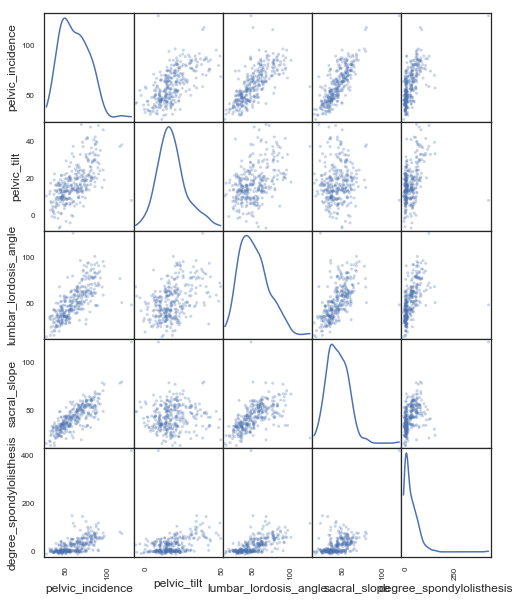

In [47]:
import pandas as pd

reduced_feature_data = pd.read_csv("reduced_feature_data.csv")
feature_cols = list(reduced_feature_data.columns[:-1])

# Visulalize the original data
pd.scatter_matrix(reduced_feature_data[feature_cols], alpha = 0.3, figsize = (8,10), diagonal = 'kde');

# Scale the data
Here we will apply a function to scale the data to make it more linearly separable and create more variance.

The log function we used generated some NA values in the data, which had to be removed. It is important to review the amount of data remaining since a significant percentage drop may leave the remaining data useless for further diagnosis.

WE also provided an alternative to use sklearn.

In [48]:
import pandas as pd
from sklearn import preprocessing
import numpy as np

feature_cols = list(reduced_feature_data.columns[:-1])
target_col = reduced_feature_data.columns[-1] 
preprocessed_data = reduced_feature_data.copy()

# Scale the data using the natural logarithm

if True:
    preprocessed_data = preprocessed_data[feature_cols].apply(np.log)
    preprocessed_data = pd.concat([preprocessed_data, reduced_feature_data[target_col]], axis = 1)

# Scale the data using preprocessing function in sklearn

if False:
    scaler=preprocessing.StandardScaler()
    scaler.fit(reduced_feature_data[feature_cols])
    preprocessed_data[feature_cols] = scaler.transform(reduced_feature_data[feature_cols])

    display(preprocessed_data.describe())

# Drop any rows that contain NA values due to the scaling
preprocessed_data.dropna(subset=feature_cols, inplace=True)

# Display the percentage of the dataset kept.
percent_kept = (float(len(preprocessed_data)) / float(len(reduced_feature_data))) * 100.00
print ("Percentage kept:  {:2.2f}%".format(percent_kept))

Percentage kept:  80.00%


# Store and display scaled data
Here we will re-introduce the classification data (to be used later during cluster sampling analysis) and persist the data in a file. This allows us to experiment throughout the project w/out having to start from the beginning every time.

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,degree_spondylolisthesis,classification
1,4.157329,2.617849,4.129138,3.915904,3.723832,Abnormal
2,4.281427,2.798548,4.092159,4.023972,2.490942,Abnormal
3,3.837090,2.405056,3.469994,3.564201,1.854238,Abnormal
4,3.442851,1.145709,3.483177,3.336884,1.287308,Abnormal
5,4.395734,3.210608,4.355259,4.030871,4.177684,Abnormal


D:\anaconda\lib\site-packages\ipykernel_launcher.py:9: FutureWarning:

pandas.scatter_matrix is deprecated, use pandas.plotting.scatter_matrix instead



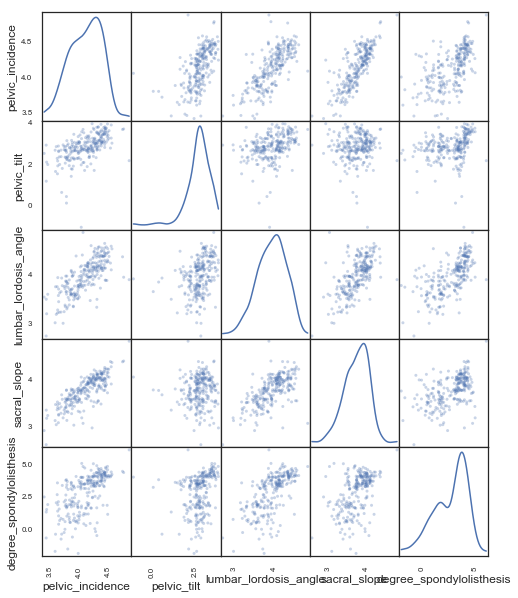

In [49]:
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Output data set so that the analysis can be restarted w/out having to replay the entire notebook
preprocessed_data.to_csv("scaled_data.csv", float_format='%.6f', index=False)

# Visualize the scaled data
display(preprocessed_data.head())
pd.scatter_matrix(preprocessed_data, alpha = 0.3, figsize = (8,10), diagonal = 'kde');

# Outlier Detection

In [50]:
import pandas as pd
import numpy as np
from collections import Counter
from IPython.display import display # Allows the use of display() for DataFrames

# Get the scaled data data set so that the analysis can be restarted w/out having to replay the entire notebook
scaled_data = pd.read_csv("scaled_data.csv")

# For each feature find the data points with extreme high or low values
outlierCounts = np.array([])

feature_cols = list(scaled_data.columns[:-1])

for feature in feature_cols:
    
    # Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(scaled_data[feature].values, 25)
    
    # Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(scaled_data[feature].values, 75)
    
    # Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5 * (Q3 - Q1)
    
    # Display the outliers
    print ("Data points considered outliers for the feature '{}':".format(feature))
    is_outlier = ~((scaled_data[feature] >= Q1 - step) & (scaled_data[feature] <= Q3 + step))
    display(scaled_data[~((scaled_data[feature] >= Q1 - step) & (scaled_data[feature] <= Q3 + step))])
    outlierCounts = np.append(outlierCounts, scaled_data[~((scaled_data[feature] >= Q1 - step) & (scaled_data[feature] <= Q3 + step))].index)

# OPTIONAL: Select the indices for data points you wish to remove
outlierCounts = outlierCounts.astype(int)
outlierCounted = Counter(outlierCounts)

print ("Number of data points that have one or more outlier features: ", len(outlierCounted))

outliers = [key for key,val in outlierCounted.items()]
print ("Data points with outliers: ", outliers)
# Remove the outliers, if any were specified
good_scaled_data = scaled_data.drop(scaled_data.index[outliers]).reset_index(drop = True)

display(good_scaled_data.describe())

# Output good scaled data set so that the analysis can be restarted w/out having to replay the entire notebook
good_scaled_data.to_csv("good_scaled_data.csv", float_format='%.6f', index=False)

Data points considered outliers for the feature 'pelvic_incidence':


,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,degree_spondylolisthesis,classification


Data points considered outliers for the feature 'pelvic_tilt':


,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,degree_spondylolisthesis,classification
3,3.442851,1.145709,3.483177,3.336884,1.287308,Abnormal
7,3.789934,0.096298,3.637586,3.764738,3.174323,Abnormal
15,3.789097,0.410171,3.831037,3.754419,3.756783,Abnormal
26,4.043667,-1.062103,3.895853,4.037587,3.954415,Abnormal
63,3.871839,1.378719,4.066365,3.785571,3.555350,Abnormal
65,3.602405,1.611612,3.736449,3.455543,-0.408815,Abnormal
136,3.635054,1.499422,3.207219,3.509298,3.514735,Abnormal
209,3.707382,0.607330,3.912023,3.661289,-0.402634,Normal


Data points considered outliers for the feature 'lumbar_lordosis_angle':


,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,degree_spondylolisthesis,classification
5,3.732124,2.884767,2.997275,3.172552,0.724143,Abnormal
214,3.441456,2.874458,2.740840,2.603916,-0.693645,Abnormal
244,3.595186,2.630407,3.007787,3.115427,-1.716372,Normal


Data points considered outliers for the feature 'sacral_slope':


,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,degree_spondylolisthesis,classification
50,4.866257,2.128764,3.87917,4.799334,6.036780,Abnormal
214,3.441456,2.874458,2.74084,2.603916,-0.693645,Abnormal


Data points considered outliers for the feature 'degree_spondylolisthesis':


,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,degree_spondylolisthesis,classification
137,3.991618,2.479484,3.761200,3.742593,-1.873736,Normal
244,3.595186,2.630407,3.007787,3.115427,-1.716372,Normal


Number of data points that have one or more outlier features:  13
Data points with outliers:  [3, 7, 15, 26, 63, 65, 136, 209, 5, 214, 244, 50, 137]


,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,degree_spondylolisthesis
count,235.000000,235.000000,235.000000,235.000000,235.000000
mean,4.135043,2.858265,3.969018,3.763647,2.810453
std,0.258649,0.495010,0.337129,0.295261,1.387750
min,3.406183,1.661207,3.178054,2.903205,-1.538281
25%,3.930890,2.598041,3.732696,3.561142,1.767889
50%,4.163168,2.833124,3.983973,3.798195,3.294940
75%,4.340101,3.197078,4.213096,3.993003,3.961674
max,4.771910,3.900595,4.834235,4.378209,5.002292


# Clustering 

The clustering portion is to isolate each classificaiton (Normal/Abnormal) into distinct clusters so that a sampling from each cluster will allow me to identify what type of data is in each cluster. The goal is to get to a point where each cluster is mostly homogenous (90%) so that I can use the cluster information to classify the original data.

This may involve repeating this process so that the clustering function can be accuratly tuned. In other words, once the clustering is complete, sample data from each cluster will be taken and scored for homogeniality. If the desired 90% is not achieved, the function will be tuned and retried.

1. Attempt to use a range of cluster components
2. Score each one
3. Use the one with the best score

In [51]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.cluster import AffinityPropagation
from sklearn.mixture import GaussianMixture
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import silhouette_score

# Get the scaled data data set so that the analysis can be restarted w/out having to replay the entire notebook
good_scaled_data = pd.read_csv("good_scaled_data.csv")

feature_cols = list(good_scaled_data.columns[:-1])
feature_data = good_scaled_data[feature_cols]

kmeans = KMeans(n_clusters=3)
afprop =  AffinityPropagation(preference=-50)
gmm_spherical = GaussianMixture(n_components=3, covariance_type='spherical', random_state = 42)

clusterers = [kmeans, afprop, gmm_spherical]

best = -1.0
for clusterer in clusterers:
    clusterer.fit(feature_data)

    # Predict the cluster for each data point
    preds = clusterer.predict(feature_data)

    # Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(feature_data, preds)
    
    print ("Clusterer {}      score {:0.4f}.".format(type(clusterer).__name__, score))

    if best < score:
        best = score
        best_clusterer = clusterer
        best_preds = preds

print ("\nThe best score was {:0.4f} using {} clusterer.".format(best, type(best_clusterer).__name__))

predictions = pd.DataFrame(best_preds, columns = ['cluster'])
predictions.to_csv("predictions.csv", float_format='%.6f', index=False)

print ("\n", predictions.groupby(['cluster']).size())

print ("\nClustering complete.")

Clusterer KMeans      score 0.3986.
Clusterer AffinityPropagation      score 0.4025.
Clusterer GaussianMixture      score 0.4016.

The best score was 0.4025 using AffinityPropagation clusterer.

 cluster
0    90
1    84
2    61
dtype: int64

Clustering complete.


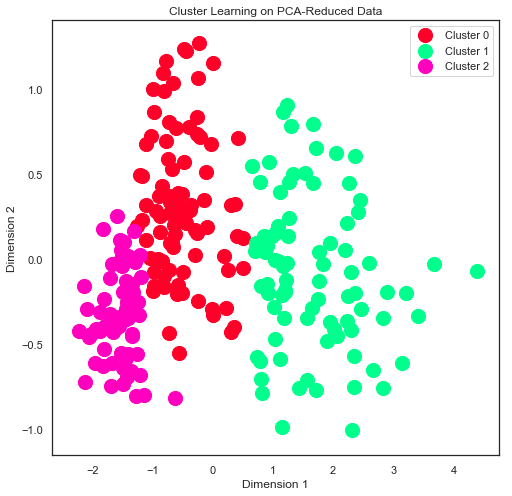

In [52]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from IPython.display import display # Allows the use of display() for DataFrames

%matplotlib inline

good_scaled_data = pd.read_csv('good_scaled_data.csv')
predictions = pd.read_csv('predictions.csv')
feature_data = good_scaled_data.drop(['classification'], axis = 1)

pca_components = 2
pca = PCA(n_components=pca_components).fit(feature_data)
reduced_data = pca.transform(feature_data)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

# Output data set
reduced_data.to_csv("reduced_data.csv", float_format='%.6f', index=False)
plot_data = pd.concat([predictions, reduced_data], axis = 1)

# Generate the cluster plot
fig, ax = plt.subplots(figsize = (8,8))

# Color map
cmap = cm.get_cmap('gist_rainbow')

clusters = plot_data['cluster'].unique()

# Color the points based on assigned cluster
for i, cluster in plot_data.groupby('cluster'):   
    cluster.plot(ax = ax, kind = 'scatter', x = 'Dimension 1', y = 'Dimension 2', \
                 color = cmap((i)*1.0/(len(clusters)-1)), label = 'Cluster %i'%(i), s=200);

# Set plot title
ax.set_title("Cluster Learning on PCA-Reduced Data");

Recombine scaled data with cluster information

1. we can map back in the descriptive data (cluster, Dimension 1, Dimesion 2, ... , Dimension N) so that we can begin to analyze what kind of data is in each cluster.
2. Save the full data set along with cluster information for further analysis

In [53]:
import pandas as pd

good_scaled_data = pd.read_csv('good_scaled_data.csv')
reduced_data = pd.read_csv('reduced_data.csv')
predicitons = pd.read_csv('predictions.csv')

full_data = pd.concat([good_scaled_data, predictions, reduced_data], axis = 1)

full_data.to_csv('full_processed_data.csv', index=False)
display(full_data.head())

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,degree_spondylolisthesis,classification,cluster,Dimension 1,Dimension 2
0,4.157329,2.617849,4.129138,3.915904,3.723832,Abnormal,0,-0.891043,0.369622
1,4.281427,2.798548,4.092159,4.023972,2.490942,Abnormal,0,0.254105,-0.064894
2,3.837090,2.405056,3.469994,3.564201,1.854238,Abnormal,1,1.121211,0.395236
3,4.395734,3.210608,4.355259,4.030871,4.177684,Abnormal,2,-1.487693,-0.193358
4,4.106831,2.757088,3.765821,3.806662,3.456113,Abnormal,0,-0.576818,0.259660


For this project, we will use the conveniently provided classification information to determine how each cluster should be classified.

In [54]:
import pandas as pd

full_data = pd.read_csv('full_processed_data.csv')

sample_data = full_data.sample(frac=0.0)
frac_samples_per_cluster = 0.20 / float(len(full_data['cluster'].unique()))
samples_per_cluster = 20

clusters = full_data['cluster'].unique()

for cluster_number in clusters:
    cluster_data = full_data[full_data['cluster'] == cluster_number].sample(n=samples_per_cluster)
    sample_data = sample_data.append(cluster_data)

print ("Chosen samples segments dataset:")
#sample_data = full_data.sample(n=20)
display(sample_data.sort_values(by=['cluster']))

sample_data.to_csv('sample_data.csv', index=False)

Chosen samples segments dataset:


,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,degree_spondylolisthesis,classification,cluster,Dimension 1,Dimension 2
71,4.395838,3.029672,4.105730,4.101356,3.701573,Abnormal,0,-0.969486,-0.077485
114,4.228482,2.713518,4.143368,3.980257,3.676250,Abnormal,0,-0.875453,0.250194
188,3.816475,2.293148,3.806662,3.570593,3.011375,Abnormal,0,-0.032304,0.675588
230,4.254183,2.600464,4.114147,4.041811,3.240184,Abnormal,0,-0.443174,0.268551
56,3.907656,1.866682,3.970292,3.768506,3.232212,Abnormal,0,-0.242148,1.064655
116,4.262014,3.003697,4.140896,3.927755,3.481927,Abnormal,0,-0.726984,-0.066053
58,4.095081,2.660935,4.061113,3.822853,3.414743,Abnormal,0,-0.571459,0.296961
23,4.361840,2.642071,4.378198,4.164477,2.517120,Abnormal,0,0.181305,0.018591
112,4.252067,2.336032,4.335591,4.092849,3.486350,Abnormal,0,-0.684243,0.527398
86,4.437764,3.413181,4.181737,3.993122,3.223604,Abnormal,0,-0.568638,-0.550551


# Analyze Samples
Here is where the manually analysed samples can be used to identify clusters.

1. Determine how pure each cluster sample is for individual classification (Normal/Abnormal)
2. If the cluster samples are too mixed, consider using additional cluster components to further isolate each class

In [55]:
import pandas as pd
from sklearn.metrics.cluster import homogeneity_score
from sklearn.metrics.cluster import v_measure_score
from sklearn.metrics import adjusted_rand_score

sample_data = pd.read_csv('sample_data.csv')

print("Homogeneity Score is:       %.2f" % homogeneity_score(sample_data['cluster'].values, sample_data['classification'].values))
print("V Measure Score is:         %.2f" % v_measure_score(sample_data['cluster'].values, sample_data['classification'].values))
print("Adjusted Rand Score is:     %.2f" % adjusted_rand_score(sample_data['cluster'].values, sample_data['classification'].values))

Homogeneity Score is:       0.24
V Measure Score is:         0.32
Adjusted Rand Score is:     0.20


# Visualize the cluster
This step is not necessary, but will present the cluster analayis over the first 2 dimensions and samples visually to provide a graphical representation of our data.

1. Blue ^ are Normal data points
2. Black v are Abnormal data points

Determine which clusters contain "Abnormal" data points

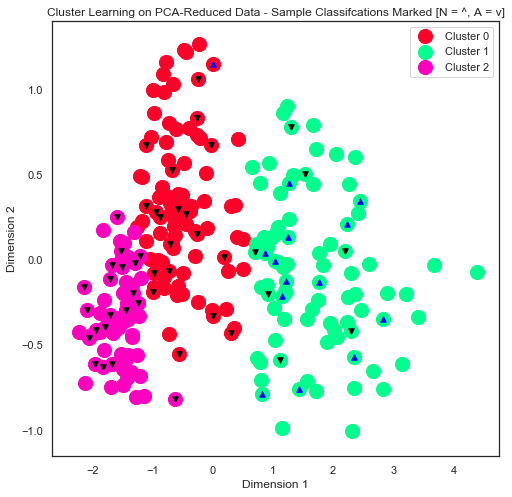

In [57]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import numpy as np
from IPython.display import display # Allows the use of display() for DataFrames

%matplotlib inline

# Visualize the cluster data
full_data = pd.read_csv('full_processed_data.csv')
sample_data = pd.read_csv('sample_data.csv')

pca_samples = sample_data[['Dimension 1', 'Dimension 2', 'classification']]

plot_data = full_data[['cluster', 'Dimension 1', 'Dimension 2']]
# Generate the cluster plot
fig, ax = plt.subplots(figsize = (8,8))

# Color map
cmap = cm.get_cmap('gist_rainbow')

centers = plot_data['cluster'].unique()

# Color the points based on assigned cluster
for i, cluster in plot_data.groupby('cluster'):   
    cluster.plot(ax = ax, kind = 'scatter', x = 'Dimension 1', y = 'Dimension 2', \
                 color = cmap((i)*1.0/(len(centers)-1)), label = 'Cluster %i'%(i), s=200);

# Plot transformed abnormal sample points 
abnormal_samples = pca_samples[(pca_samples['classification'] == 'Abnormal')].values
ax.scatter(x = abnormal_samples[:,0], y = abnormal_samples[:,1], \
           s = 30, linewidth = 1, color = 'black', marker = 'v');

# Plot transformed normal sample points 
abnormal_samples = pca_samples[(pca_samples['classification'] == 'Normal')].values
ax.scatter(x = abnormal_samples[:,0], y = abnormal_samples[:,1], \
           s = 30, linewidth = 1, color = 'blue', marker = '^');
# Set plot title
ax.set_title("Cluster Learning on PCA-Reduced Data - Sample Classifcations Marked [N = ^, A = v]");

# Build Training Dataset
1. Build a training datafram using the full data and the cluster information.
2. Store the training data to a csv file

In [58]:
import pandas as pd
import numpy as np
from IPython.display import display # Allows the use of display() for DataFrames

full_data = pd.read_csv('full_processed_data.csv')
training_data = full_data.drop(['classification', 'Dimension 1', 'Dimension 2'], axis=1)

training_data.loc[training_data['cluster'].isin(abnormal_clusters), 'project_classification'] = 'Abnormal'
training_data.loc[~training_data['cluster'].isin(abnormal_clusters), 'project_classification'] = 'Normal'

training_data.drop(['cluster'], axis=1, inplace=True)

# Randomize the data
training_data = training_data.sample(frac=1.0)

training_data.to_csv('training_data.csv', float_format='%.6f', index=False)

display(training_data.head())
print ("Training data created.")

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,degree_spondylolisthesis,project_classification
13,4.446788,2.762848,4.272054,4.241433,4.331004,Normal
161,4.488803,3.261015,4.234415,4.142164,1.801959,Normal
44,4.522074,3.566505,4.349206,4.036603,4.061435,Normal
59,4.197310,3.039638,3.457183,3.820116,0.416869,Normal
108,4.080374,2.678467,3.765821,3.797843,1.040455,Normal


Training data created.


# Classification
In this section we will take the training data derived above to create a classifier

Extract the Feature Data from the Target Data

In [59]:
import pandas as pd

training_data = pd.read_csv('training_data.csv')

# Extract feature columns (first set)
feature_cols = list(training_data.columns[:-1])

# Extract target column 'false_positive' (last column)
target_col = training_data.columns[-1] 

# Show the list of columns
print ("Feature columns:\n{}".format(feature_cols))
print ("\nTarget column: {}".format(target_col))

# Separate the data into feature data and target data (X_all and y_all, respectively)
X_all = training_data[feature_cols]
y_all = training_data[target_col]

Feature columns:
['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope', 'degree_spondylolisthesis']

Target column: project_classification


Train and Score Models
1. We will attempt 3 different models
2. Train and score each one
3. Select the one with the best test scores

# Model Tuning
Using GridSearch and Cross Validation, find optimal tuning parameters for classifier

In [61]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

# Perform grid search on the classifier using the f1_scorer as the scoring method
grid_obj = GridSearchCV(best_clf, param_grid=best_parms, cv=10)

# Fit the grid search object to the training data and find the optimal parameters
grid_obj.fit(X_all, y_all)

print ("Best parameters set found on development set:")
print (grid_obj.best_params_)
print ()
# Get the estimator
clf = grid_obj.best_estimator_
print (clf)

print ("\nBest score: {:.4f}.".format(grid_obj.best_score_))

Best parameters set found on development set:
{'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'best'}

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

Best score: 1.0000.


# Model Persitance

1. Save the model to a file called classification_model.pkl
2. Test loading the model
3. Test the loaded model

In [62]:
from sklearn.externals import joblib
from sklearn.metrics import f1_score, make_scorer
from sklearn.model_selection import train_test_split
import math

# Shuffle and split the dataset into the number of training and testing points above
X_train, X_test, y_train, y_test = train_test_split(
    X_all, y_all, train_size=0.75, test_size=0.25, random_state=42)

# Show the results of the split
print ("Training set has {} samples.".format(X_train.shape[0]))
print ("Testing set has {} samples.".format(X_test.shape[0]))

joblib.dump(clf, 'classification_model.pkl')
loaded_clf = joblib.load('classification_model.pkl')

testing_pred = loaded_clf.predict(X_test)
# Get Score based on training data
f1_score_testing_data = f1_score(y_test.values, testing_pred, pos_label="Abnormal")
print ("F1 score for test set: {:.4f}.".format(f1_score_testing_data))

Training set has 176 samples.
Testing set has 59 samples.
F1 score for test set: 0.0000.


In [64]:
# Finally score the original classification to the one derived by the model
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

full_data = pd.read_csv('full_processed_data.csv')
validation_data = full_data.drop(['cluster', 'Dimension 1', 'Dimension 2'], axis=1)

# Extract feature columns (first set)
feature_cols = list(validation_data.columns[:-1])

# Extract target column 'false_positive' (last column)
target_col = validation_data.columns[-1] 

# Show the list of columns
print ("Feature columns:\n{}".format(feature_cols))
print ("\nTarget column: {}".format(target_col))

# Separate the data into feature data and target data (X_all and y_all, respectively)
X_all = validation_data[feature_cols]
y_all = validation_data[target_col]

loaded_clf = joblib.load('classification_model.pkl')

validation_pred = loaded_clf.predict(X_all)
# Get Score based on training data
validation_score = accuracy_score(y_all.values, validation_pred)
print ("\nValidation accuracy score: {:.4f}".format(validation_score))

target_names = ['Abnormal', 'Normal']

report = classification_report(y_all.values, validation_pred, target_names)
cf_matrix = confusion_matrix(y_all.values, validation_pred, target_names)

confusion = pd.crosstab(y_all, validation_pred, rownames=['Actual'], colnames=['Classified As'])

display(confusion)


cf_matrix = confusion.values
sensitivity = cf_matrix[0][0] / float(np.sum(cf_matrix[0][0:]))
specificity =  cf_matrix[1][1] / float(np.sum(cf_matrix[1][0:]))



Feature columns:
['pelvic_incidence', 'pelvic_tilt', 'lumbar_lordosis_angle', 'sacral_slope', 'degree_spondylolisthesis']

Target column: classification

Validation accuracy score: 0.2426


D:\anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

D:\anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.

D:\anaconda\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.



Classified As,Normal
Actual,
Abnormal,178
Normal,57


IndexError: index 1 is out of bounds for axis 0 with size 1